In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sagemaker
import boto3
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
client = boto3.client('s3')
import feather
import matplotlib.pyplot as plt

In [2]:
path = 's3://haseebdata/EDNET DATA/Ednet feather files/KT3.ftr'

In [3]:
df = pd.read_feather(path)
df.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
0,2019-08-06 12:55:51.269,enter,b3544,diagnosis,None,mobile,1
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
2,2019-08-06 12:56:34.904,submit,b3544,diagnosis,None,mobile,1
3,2019-08-06 12:56:35.001,enter,b3238,diagnosis,None,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1


In [4]:
A = df.loc[df['action_type'].isin(['respond'])]
A.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1
7,2019-08-06 12:58:10.094,respond,q4366,diagnosis,b,mobile,1
10,2019-08-06 12:58:57.361,respond,q4829,diagnosis,a,mobile,1
13,2019-08-06 12:59:55.328,respond,q6528,diagnosis,b,mobile,1


In [5]:
A.shape

(23371166, 7)

In [6]:
B_userid_counts = A.user_iD.value_counts()
mask = B_userid_counts >= 30
filtered_userids = mask[mask].index

B = A[A.user_iD.isin(filtered_userids)]

In [7]:
B.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1
7,2019-08-06 12:58:10.094,respond,q4366,diagnosis,b,mobile,1
10,2019-08-06 12:58:57.361,respond,q4829,diagnosis,a,mobile,1
13,2019-08-06 12:59:55.328,respond,q6528,diagnosis,b,mobile,1


In [8]:
df = B.copy()

In [9]:
print(df.dtypes)

timestamp      datetime64[ns]
action_type            object
item_id                object
source                 object
user_answer            object
platform               object
user_iD                 int32
dtype: object


In [10]:
df.to_csv('K3Mod.csv')

In [11]:
B.shape

(21146812, 7)

<AxesSubplot:>

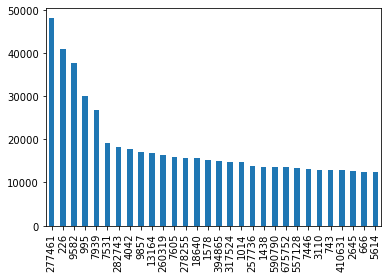

In [12]:
B['user_iD'].value_counts()[:30].plot(kind='bar')

<AxesSubplot:>

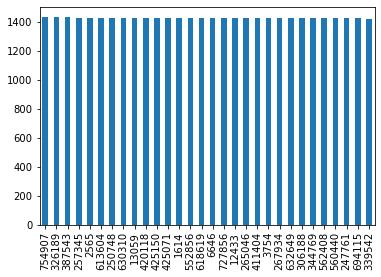

In [13]:
B['user_iD'].value_counts()[3000:3030].plot(kind='bar')

<AxesSubplot:>

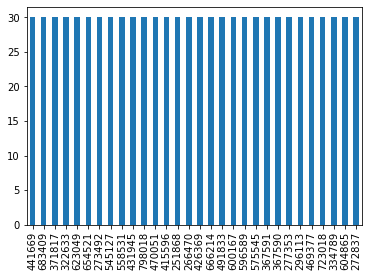

In [14]:
B['user_iD'].value_counts()[60000:60030].plot(kind='bar')

IndexError: index 0 is out of bounds for axis 0 with size 0

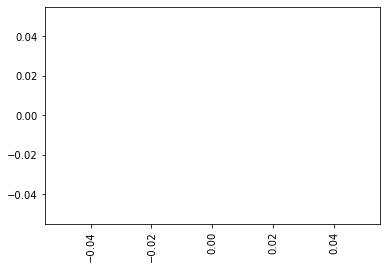

In [15]:
B['user_iD'].value_counts()[62000:62030].plot(kind='bar')

In [10]:
questions = pd.read_csv('s3://haseebdata/EDNET DATA/EDNET Content CSV/questions.csv')

In [11]:
questions.head()

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at
0,q1,b1,e1,b,1,1;2;179;181,1558093217098
1,q2,b2,e2,a,1,15;2;182,1558093219720
2,q3,b3,e3,b,1,14;2;179;183,1558093222784
3,q4,b4,e4,b,1,9;2;179;184,1558093225357
4,q5,b5,e5,c,1,8;2;179;181,1558093228439


In [ ]:
output_dict1 = {"user_iD": [], "question_id": [], "correct": [], "incorrect": []}
output_dict2 = {"user_iD": [], "question_count": [], "correct": [], "incorrect": []}
for b_id in qDF['bundle_id'].unique():
    output_dict2['bundle_id'].append(b_id)
    output_dict2['question_count'].append(0)
    output_dict2['correct'].append(0)
    output_dict2['incorrect'].append(0)
    qDF_filtered_by_bundle = qDF.loc[qDF["bundle_id"]==b_id]
    item_counts = rDF['item_id'].value_counts()
    for _, qDF_row in qDF_filtered_by_bundle.iterrows():
        question = qDF_row['question_id']
        rDF_filtered_by_question = rDF.loc[rDF["item_id"]==question]
        original_answer = qDF_row['correct_answer']
        output_dict2['question_count'][-1] += 1
        for _, rDF_row in rDF_filtered_by_question.iterrows():
            user_answer = rDF_row['user_answer']
            if question not in output_dict1['question_id']:
                output_dict1['bundle_id'].append(b_id)
                output_dict1['question_id'].append(question)
                output_dict1['correct'].append(0)
                output_dict1['incorrect'].append(0)
            if user_answer == original_answer:
                output_dict1['correct'][output_dict1['question_id'].index(question)] += 1
                output_dict2['correct'][-1] += 1
            else:
                output_dict1['incorrect'][output_dict1['question_id'].index(question)] += 1
                output_dict2['incorrect'][-1] += 1
        
output1 = pd.DataFrame(data=output_dict1)
output2 = pd.DataFrame(data=output_dict2)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter

In [5]:
print(f'We have {df.user_iD.nunique()} unique users in our dataset')

We have 289886 unique users in our dataset


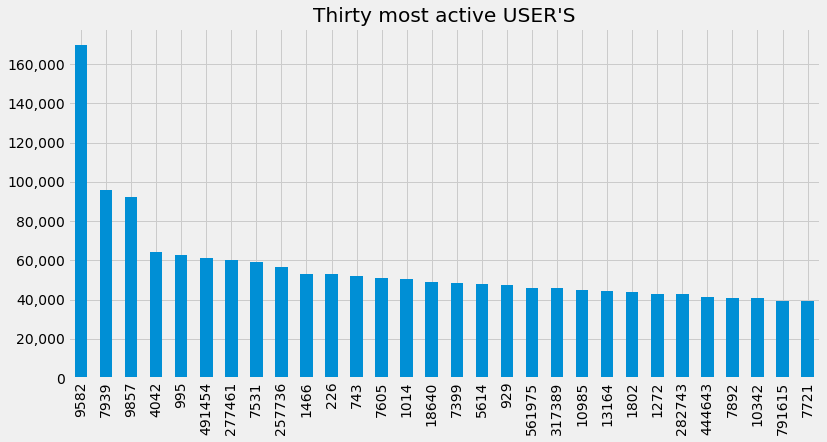

In [9]:
cids = df.user_iD.value_counts()[:30]

fig = plt.figure(figsize=(12,6))
ax = cids.plot.bar()
plt.title("Thirty most active USER'S")
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.show()

In [20]:
user_percent = questions[questions.correct_answer != -1].groupby('user_iD')['correct_answer'].agg(Mean='mean', Answers='count')
print(f'the highest number of questions answered by a user is {user_percent.Answers.max()}')

KeyError: 'user_iD'

In [25]:
w= (df['user_answer']== 'a').mean()
x= (df['user_answer']== 'b').mean()
y= (df['user_answer']== 'c').mean()
z= (df['user_answer']== 'd').mean()
q = (df['user_answer']== 'None').mean()

print (q+w+x+y+z)

0.26192761892192656


In [34]:
df['user_answer'].value_counts(dropna=False)

NaN    65856408
b       6786268
a       6376712
c       6072168
d       4136018
Name: user_answer, dtype: int64

In [25]:
grouped_by_user_df = B.groupby('user_iD')

In [27]:
user_answers_df = questions.agg({'correct_answer': ['mean', 'count'] })

In [29]:
user_answers_df.head()

,correct_answer
count,13169


In [32]:
user_answers_df[('answered_correctly','count')].hist(bins = 100)

KeyError: ('answered_correctly', 'count')

In [ ]:
questions_df = questions_df.merge(content_answers_df, left_on = 'question_id', right_on = 'content_id', how = 'left')

In [35]:
B['answer_correctly'] = questions['correct_answer']
#df2['hour'] = df1['hour']

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [36]:
B.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD,answer_correctly
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1,a
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1,c
7,2019-08-06 12:58:10.094,respond,q4366,diagnosis,b,mobile,1,b
10,2019-08-06 12:58:57.361,respond,q4829,diagnosis,a,mobile,1,b
13,2019-08-06 12:59:55.328,respond,q6528,diagnosis,b,mobile,1,a


In [47]:
df.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
0,2019-08-06 12:55:51.269,enter,b3544,diagnosis,None,mobile,1
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
2,2019-08-06 12:56:34.904,submit,b3544,diagnosis,None,mobile,1
3,2019-08-06 12:56:35.001,enter,b3238,diagnosis,None,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1


In [48]:
df['correct_answer'] = questions['correct_answer']

In [49]:
df.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD,correct_answer
0,2019-08-06 12:55:51.269,enter,b3544,diagnosis,None,mobile,1,b
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1,a
2,2019-08-06 12:56:34.904,submit,b3544,diagnosis,None,mobile,1,b
3,2019-08-06 12:56:35.001,enter,b3238,diagnosis,None,mobile,1,b
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1,c


In [53]:
(df['user_answer']==-1).mean()

0.0

In [54]:
train_questions_only_df = df[df['user_answer']!=-1]
train_questions_only_df['user_answer'].mean()

TypeError: unsupported operand type(s) for +: 'int' and 'str'